### Import libraries

In [47]:
import pandas as pd
from datetime import datetime
!pip install plotly
import plotly.express as px
from plotly.subplots import make_subplots

import os

if not os.path.exists("../images"):
    os.mkdir("../images")
from IPython.display import Image
#!conda install -c plotly plotly-orca

Solving environment: done

# All requested packages already installed.



### Read the Covid Super data

In [2]:
super_data = pd.read_csv("../data/covid_large.csv")

In [3]:
super_data.head()

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population
0,AL,0,statewide unallocated,2020-01-22,0,0,0
1,AL,0,statewide unallocated,2020-01-23,0,0,0
2,AL,0,statewide unallocated,2020-01-24,0,0,0
3,AL,0,statewide unallocated,2020-01-25,0,0,0
4,AL,0,statewide unallocated,2020-01-26,0,0,0


### Calculate new cases and deaths for each date

In [4]:
super_data['Num of Cases Per Day'] = super_data['Num of Cases'].diff()
super_data['Num of Deaths Per Day'] = super_data['Num of Deaths'].diff()

In [5]:
super_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
0,AL,0,statewide unallocated,2020-01-22,0,0,0,NaN,NaN
1,AL,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
2,AL,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
3,AL,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
4,AL,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
757210,WY,56045,weston county,2020-09-10,21,0,6927,0.0,0.0
757211,WY,56045,weston county,2020-09-11,21,0,6927,0.0,0.0
757212,WY,56045,weston county,2020-09-12,23,0,6927,2.0,0.0
757213,WY,56045,weston county,2020-09-13,23,0,6927,0.0,0.0


In [6]:
#Remove first date as we are finding difference we get the first value as NAN
super_data= super_data[super_data['Date'] != '2020-01-22']
super_data

,State,countyFIPS,County Name,Date,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
1,AL,0,statewide unallocated,2020-01-23,0,0,0,0.0,0.0
2,AL,0,statewide unallocated,2020-01-24,0,0,0,0.0,0.0
3,AL,0,statewide unallocated,2020-01-25,0,0,0,0.0,0.0
4,AL,0,statewide unallocated,2020-01-26,0,0,0,0.0,0.0
5,AL,0,statewide unallocated,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
757210,WY,56045,weston county,2020-09-10,21,0,6927,0.0,0.0
757211,WY,56045,weston county,2020-09-11,21,0,6927,0.0,0.0
757212,WY,56045,weston county,2020-09-12,23,0,6927,2.0,0.0
757213,WY,56045,weston county,2020-09-13,23,0,6927,0.0,0.0


### Calculate the total number of cases on each day by using groupby date

In [7]:
super_data_date = super_data.groupby("Date").sum().reset_index()
super_data_date

,Date,countyFIPS,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
0,2020-01-23,95473696,1,0,328239523,0.0,0.0
1,2020-01-24,95473696,2,0,328239523,1.0,0.0
2,2020-01-25,95473696,2,0,328239523,0.0,0.0
3,2020-01-26,95473696,5,0,328239523,3.0,0.0
4,2020-01-27,95473696,6,0,328239523,1.0,0.0
...,...,...,...,...,...,...,...
231,2020-09-10,95473696,6346870,190431,328239523,35510.0,1068.0
232,2020-09-11,95473696,6393156,191524,328239523,46286.0,1093.0
233,2020-09-12,95473696,6432289,192218,328239523,39133.0,694.0
234,2020-09-13,95473696,6467081,192603,328239523,34792.0,385.0


In [8]:
#Convertion to date format and stripping time
super_data_date['Date'] = super_data_date.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [9]:
super_data_date

,Date,countyFIPS,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day
0,2020-01-23,95473696,1,0,328239523,0.0,0.0
1,2020-01-24,95473696,2,0,328239523,1.0,0.0
2,2020-01-25,95473696,2,0,328239523,0.0,0.0
3,2020-01-26,95473696,5,0,328239523,3.0,0.0
4,2020-01-27,95473696,6,0,328239523,1.0,0.0
...,...,...,...,...,...,...,...
231,2020-09-10,95473696,6346870,190431,328239523,35510.0,1068.0
232,2020-09-11,95473696,6393156,191524,328239523,46286.0,1093.0
233,2020-09-12,95473696,6432289,192218,328239523,39133.0,694.0
234,2020-09-13,95473696,6467081,192603,328239523,34792.0,385.0


### Normalize the number of cases and deaths by the population

In [10]:
super_data_date['Num of Cases Per Day Normalized']= (super_data_date['Num of Cases Per Day']/super_data_date['population'])*1000000
super_data_date['Num of Deaths Per Day Normalized']= (super_data_date['Num of Deaths Per Day']/super_data_date['population'])*1000000
super_data_date

,Date,countyFIPS,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-23,95473696,1,0,328239523,0.0,0.0,0.000000,0.000000
1,2020-01-24,95473696,2,0,328239523,1.0,0.0,0.003047,0.000000
2,2020-01-25,95473696,2,0,328239523,0.0,0.0,0.000000,0.000000
3,2020-01-26,95473696,5,0,328239523,3.0,0.0,0.009140,0.000000
4,2020-01-27,95473696,6,0,328239523,1.0,0.0,0.003047,0.000000
...,...,...,...,...,...,...,...,...,...
231,2020-09-10,95473696,6346870,190431,328239523,35510.0,1068.0,108.183194,3.253722
232,2020-09-11,95473696,6393156,191524,328239523,46286.0,1093.0,141.012879,3.329885
233,2020-09-12,95473696,6432289,192218,328239523,39133.0,694.0,119.220865,2.114310
234,2020-09-13,95473696,6467081,192603,328239523,34792.0,385.0,105.995767,1.172924


### Calculate the weekly number of cases and deaths

In [11]:
super_data_groupedByWeek = super_data_date.groupby([ pd.Grouper(key='Date', freq='w')])['Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized'].agg({'Num of Cases Per Day Normalized':'mean',
                                                                                                'Num of Deaths Per Day Normalized' :'mean'}).reset_index().round(decimals=0)
super_data_groupedByWeek

,Date,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-26,0.0,0.0
1,2020-02-02,0.0,0.0
2,2020-02-09,0.0,0.0
3,2020-02-16,0.0,0.0
4,2020-02-23,0.0,0.0
5,2020-03-01,0.0,0.0
6,2020-03-08,0.0,0.0
7,2020-03-15,1.0,0.0
8,2020-03-22,13.0,0.0
9,2020-03-29,47.0,1.0


### Task 1.1 weekly statistics:  Calculate the mean median and mode of the number of cases and deaths

In [12]:
# Calculate mean and median of number of cases
super_data_groupedByWeek["Num of Cases Per Day Normalized"].agg(["mean","median"])

mean      83.314286
median    84.000000
Name: Num of Cases Per Day Normalized, dtype: float64

In [13]:
# Calculate mean and median of number of deaths
super_data_groupedByWeek["Num of Deaths Per Day Normalized"].agg(["mean","median"])

mean      2.457143
median    3.000000
Name: Num of Deaths Per Day Normalized, dtype: float64

In [14]:
#calculate the mode of number of cases
super_data_groupedByWeek["Num of Cases Per Day Normalized"].mode()

0    0.0
dtype: float64

In [15]:
#calculate the mode of number of deaths
super_data_groupedByWeek["Num of Deaths Per Day Normalized"].mode()

0    3.0
dtype: float64

### Read the covid data across the world

In [16]:
other_country_data = pd.read_csv("../data/owid-covid-data.csv")
other_country_data.head()

/home/rashmi/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


### Task 1.2 : Select 5 countries to compare the covid data

In [17]:
# Here we are selecting "India","Pakistan","Brazil","Russia","Mexico" as the population of these countries are comparable to the population of USA 
other_country_data = other_country_data[other_country_data["location"].isin(["India","Pakistan","Brazil","Russia","Mexico"])]
other_country_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6390,BRA,South America,Brazil,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
6391,BRA,South America,Brazil,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
6392,BRA,South America,Brazil,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
6393,BRA,South America,Brazil,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
6394,BRA,South America,Brazil,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20,75.88,0.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38686,RUS,Europe,Russia,2020-10-08,1248619.0,11115.0,10333.286,21865.0,202.0,163.286,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
38687,RUS,Europe,Russia,2020-10-09,1260112.0,11493.0,10697.286,22056.0,191.0,166.429,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
38688,RUS,Europe,Russia,2020-10-10,1272238.0,12126.0,11085.000,22257.0,201.0,168.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816
38689,RUS,Europe,Russia,2020-10-11,1285084.0,12846.0,11511.714,22454.0,197.0,171.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.816


In [18]:
#Fill the missing data values with 0
other_country_data = other_country_data.fillna(0)
other_country_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
6390,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.000,0.0,0.0,0.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.20,75.88,0.759
6391,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.000,0.0,0.0,0.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.20,75.88,0.759
6392,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.000,0.0,0.0,0.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.20,75.88,0.759
6393,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.000,0.0,0.0,0.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.20,75.88,0.759
6394,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.000,0.0,0.0,0.000,...,14103.452,3.4,177.961,8.11,10.1,17.9,0.0,2.20,75.88,0.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38686,RUS,Europe,Russia,2020-10-08,1248619.0,11115.0,10333.286,21865.0,202.0,163.286,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.816
38687,RUS,Europe,Russia,2020-10-09,1260112.0,11493.0,10697.286,22056.0,191.0,166.429,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.816
38688,RUS,Europe,Russia,2020-10-10,1272238.0,12126.0,11085.000,22257.0,201.0,168.571,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.816
38689,RUS,Europe,Russia,2020-10-11,1285084.0,12846.0,11511.714,22454.0,197.0,171.857,...,24765.954,0.1,431.297,6.18,23.4,58.3,0.0,8.05,72.58,0.816


In [19]:
#Convertion to date format and stripping time
other_country_data['date'] = other_country_data.date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

### Calculate the weekly mean number of cases and deaths across the 5 selected countries

In [20]:
other_country_weekly_mean = other_country_data.groupby(["location", pd.Grouper(key='date', freq='w')]).mean().reset_index().round(decimals=0)
other_country_weekly_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 38 columns):
location                           210 non-null object
date                               210 non-null datetime64[ns]
total_cases                        210 non-null float64
new_cases                          210 non-null float64
new_cases_smoothed                 210 non-null float64
total_deaths                       210 non-null float64
new_deaths                         210 non-null float64
new_deaths_smoothed                210 non-null float64
total_cases_per_million            210 non-null float64
new_cases_per_million              210 non-null float64
new_cases_smoothed_per_million     210 non-null float64
total_deaths_per_million           210 non-null float64
new_deaths_per_million             210 non-null float64
new_deaths_smoothed_per_million    210 non-null float64
new_tests                          210 non-null float64
total_tests                        210 non-null f

In [21]:
# From the other country data we observe that there is column which gives the new cases and deaths per million,
# so we make use of those 2 columns
other_country_weekly_mean[['location','date','new_cases_per_million','new_deaths_per_million']]

,location,date,new_cases_per_million,new_deaths_per_million
0,Brazil,2020-01-05,0.0,0.0
1,Brazil,2020-01-12,0.0,0.0
2,Brazil,2020-01-19,0.0,0.0
3,Brazil,2020-01-26,0.0,0.0
4,Brazil,2020-02-02,0.0,0.0
...,...,...,...,...
205,Russia,2020-09-20,39.0,1.0
206,Russia,2020-09-27,45.0,1.0
207,Russia,2020-10-04,60.0,1.0
208,Russia,2020-10-11,79.0,1.0


### Calculate the mean and median of the other countries for comparison 

In [22]:
other_country_weekly_mean_stats= other_country_weekly_mean.groupby('location')['new_cases_per_million'].agg(['mean','median']).reset_index()
other_country_weekly_mean_stats

,location,mean,median
0,Brazil,82.785714,67.5
1,India,18.523810,4.5
2,Mexico,21.476190,18.0
3,Pakistan,4.928571,3.0
4,Russia,32.142857,36.0


In [23]:
# Weekly mean and median of US and other 5 countries 
super_data_groupedByWeek=super_data_groupedByWeek["Num of Cases Per Day Normalized"].agg(["mean","median"]).reset_index()
new_row = {'location':'United States','mean':83.314,'median':84}
other_country_weekly_mean_stats= other_country_weekly_mean_stats.append(new_row,ignore_index=True)
other_country_weekly_mean_stats

,location,mean,median
0,Brazil,82.785714,67.5
1,India,18.523810,4.5
2,Mexico,21.476190,18.0
3,Pakistan,4.928571,3.0
4,Russia,32.142857,36.0
5,United States,83.314000,84.0


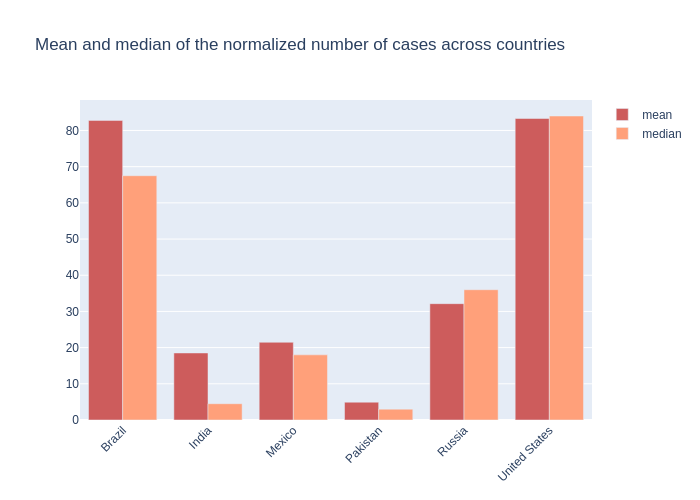

In [50]:
import plotly.graph_objects as go
from IPython.display import Image

fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_country_weekly_mean_stats['location'],
    y=other_country_weekly_mean_stats['mean'],
    name='mean',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=other_country_weekly_mean_stats['location'],
    y=other_country_weekly_mean_stats['median'],
    name='median',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Mean and median of the normalized number of cases across countries")

fig.write_image("../images/team_meanCases.png")
Image(filename="../images/team_meanCases.png")

### Conclusion

- We observe that the mean and median of the normalized number of cases of US is more than Inida,Mexico,Pakisthan and Russia where as it is almost the same as that of brazil

In [25]:
other_country_weekly_mean_deaths=other_country_weekly_mean.groupby('location')['new_deaths_per_million'].agg(['mean','median']).reset_index()
new_row = {'location':'United States','mean':2.45,'median':3}
other_country_weekly_mean_deaths= other_country_weekly_mean_deaths.append(new_row,ignore_index=True)
other_country_weekly_mean_deaths

,location,mean,median
0,Brazil,2.476190,3.0
1,India,0.309524,0.0
2,Mexico,2.166667,2.0
3,Pakistan,0.023810,0.0
4,Russia,0.595238,1.0
5,United States,2.450000,3.0


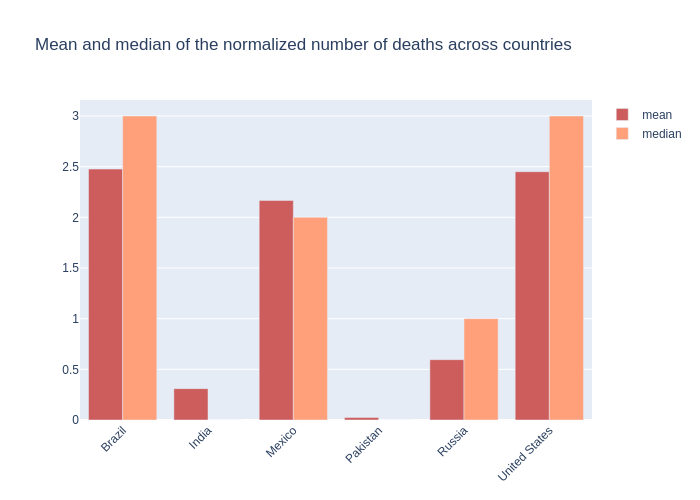

In [51]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=other_country_weekly_mean_deaths['location'],
    y=other_country_weekly_mean_deaths['mean'],
    name='mean',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=other_country_weekly_mean_deaths['location'],
    y=other_country_weekly_mean_deaths['median'],
    name='median',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
    title="Mean and median of the normalized number of deaths across countries")
fig.write_image("../images/team_meanDeaths.png")
Image(filename="../images/team_meanDeaths.png")
#fig.show()

### Conclusion
- We observe that the mean and median of the normalized number of deaths of US is more than Inida,Mexico,Pakisthan and Russia where as it is almost the same as that of brazil

In [27]:
super_data_mean= super_data.groupby("Date").mean().reset_index()
super_data_mean['Num of Cases Per Day Normalized']= (super_data_mean['Num of Cases Per Day']/super_data_mean['population'])*1000000
super_data_mean['Num of Deaths Per Day Normalized']= (super_data_mean['Num of Deaths Per Day']/super_data_mean['population'])*1000000
super_data_mean

,Date,countyFIPS,Num of Cases,Num of Deaths,population,Num of Cases Per Day,Num of Deaths Per Day,Num of Cases Per Day Normalized,Num of Deaths Per Day Normalized
0,2020-01-23,29882.22097,0.000313,0.000000,102735.374961,0.000000,0.000000,0.000000,0.000000
1,2020-01-24,29882.22097,0.000626,0.000000,102735.374961,0.000313,0.000000,0.003047,0.000000
2,2020-01-25,29882.22097,0.000626,0.000000,102735.374961,0.000000,0.000000,0.000000,0.000000
3,2020-01-26,29882.22097,0.001565,0.000000,102735.374961,0.000939,0.000000,0.009140,0.000000
4,2020-01-27,29882.22097,0.001878,0.000000,102735.374961,0.000313,0.000000,0.003047,0.000000
...,...,...,...,...,...,...,...,...,...
231,2020-09-10,29882.22097,1986.500782,59.602817,102735.374961,11.114241,0.334272,108.183194,3.253722
232,2020-09-11,29882.22097,2000.987793,59.944914,102735.374961,14.487011,0.342097,141.012879,3.329885
233,2020-09-12,29882.22097,2013.235994,60.162128,102735.374961,12.248200,0.217214,119.220865,2.114310
234,2020-09-13,29882.22097,2024.125509,60.282629,102735.374961,10.889515,0.120501,105.995767,1.172924


### Task 1.3

In [28]:
#Add location as united states for the super data frame and renaming columns
super_data_mean['location']='United States'
super_data_mean_new =super_data_mean[['Date','location','Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized']]
super_data_mean_new.rename(columns={"Date":'date','Num of Cases Per Day Normalized':'new_cases_per_million','Num of Deaths Per Day Normalized':'new_deaths_per_million'},inplace=True)
super_data_mean_new

/home/rashmi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,location,new_cases_per_million,new_deaths_per_million
0,2020-01-23,United States,0.000000,0.000000
1,2020-01-24,United States,0.003047,0.000000
2,2020-01-25,United States,0.000000,0.000000
3,2020-01-26,United States,0.009140,0.000000
4,2020-01-27,United States,0.003047,0.000000
...,...,...,...,...
231,2020-09-10,United States,108.183194,3.253722
232,2020-09-11,United States,141.012879,3.329885
233,2020-09-12,United States,119.220865,2.114310
234,2020-09-13,United States,105.995767,1.172924


In [29]:
#Create a new data frame for ploting the daily trends
graph_df= other_country_data[['date','location','new_cases_per_million','new_deaths_per_million']] 
graph_df['date'] = graph_df.date.apply(lambda d: datetime.strftime(d, '%Y-%m-%d'))

/home/rashmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
graph_df= other_country_data[['date','location','new_cases_per_million','new_deaths_per_million']]
graph_df=graph_df.append(super_data_mean_new)

### Daily Trends of New Cases 

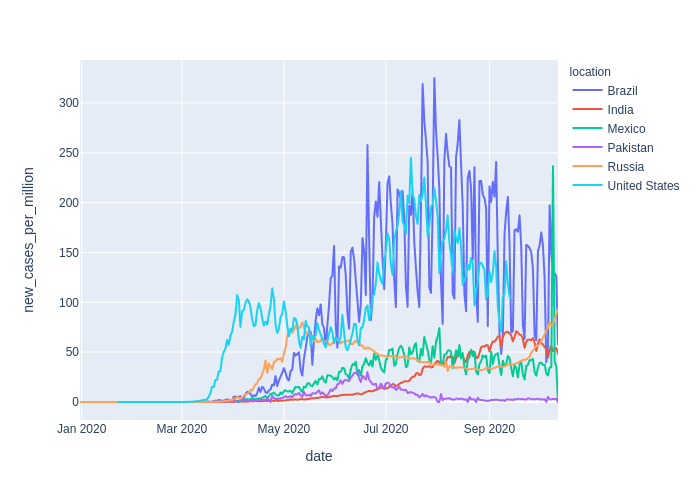

In [53]:
import plotly.express as px


fig = px.line(graph_df, x="date", y="new_cases_per_million", color='location')
fig.write_image("../images/team_dailyCases.png")
Image(filename="../images/team_dailyCases.png")
#fig.show()

### Daily Trends of Deaths

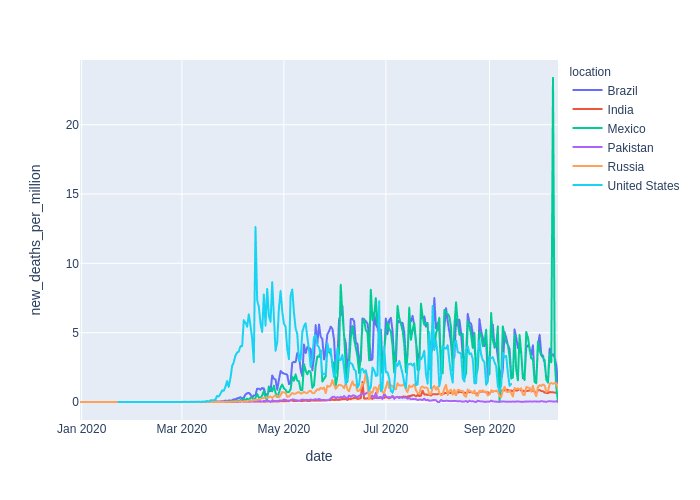

In [54]:
fig = px.line(graph_df, x="date", y="new_deaths_per_million", color='location')
fig.write_image("../images/team_dailyDeaths.png")
Image(filename="../images/team_dailyDeaths.png")
#fig.show()

### Task 1.4 Weekly Trends

In [33]:
# Calculate the weekly mean 
other_country_weekly_mean_new=other_country_weekly_mean[['location','date','new_cases_per_million','new_deaths_per_million']]
other_country_weekly_mean_new
us_weekly_data=super_data_date.groupby([ pd.Grouper(key='Date', freq='w')])['Num of Cases Per Day Normalized','Num of Deaths Per Day Normalized'].agg({'Num of Cases Per Day Normalized':'mean',
                                                                                                'Num of Deaths Per Day Normalized' :'mean'}).reset_index().round(decimals=0)


us_weekly_data
us_weekly_data['location']='United States'

us_weekly_data.rename(columns={"Date":'date','Num of Cases Per Day Normalized':'new_cases_per_million','Num of Deaths Per Day Normalized':'new_deaths_per_million'},inplace=True)
us_weekly_data

,date,new_cases_per_million,new_deaths_per_million,location
0,2020-01-26,0.0,0.0,United States
1,2020-02-02,0.0,0.0,United States
2,2020-02-09,0.0,0.0,United States
3,2020-02-16,0.0,0.0,United States
4,2020-02-23,0.0,0.0,United States
5,2020-03-01,0.0,0.0,United States
6,2020-03-08,0.0,0.0,United States
7,2020-03-15,1.0,0.0,United States
8,2020-03-22,13.0,0.0,United States
9,2020-03-29,47.0,1.0,United States


In [34]:
#creating new data frame for getting the graph
other_country_weekly_mean_new=other_country_weekly_mean_new.append(us_weekly_data)
other_country_weekly_mean_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 34
Data columns (total 4 columns):
date                      245 non-null datetime64[ns]
location                  245 non-null object
new_cases_per_million     245 non-null float64
new_deaths_per_million    245 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 9.6+ KB


/home/rashmi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [35]:
# Stripping the time from date
other_country_weekly_mean_new['date'] = other_country_weekly_mean_new.date.apply(lambda d: datetime.strftime(d, '%Y-%m-%d'))
other_country_weekly_mean_new

,date,location,new_cases_per_million,new_deaths_per_million
0,2020-01-05,Brazil,0.0,0.0
1,2020-01-12,Brazil,0.0,0.0
2,2020-01-19,Brazil,0.0,0.0
3,2020-01-26,Brazil,0.0,0.0
4,2020-02-02,Brazil,0.0,0.0
...,...,...,...,...
30,2020-08-23,United States,129.0,3.0
31,2020-08-30,United States,126.0,3.0
32,2020-09-06,United States,124.0,3.0
33,2020-09-13,United States,104.0,2.0


## Weekly New Cases Trends

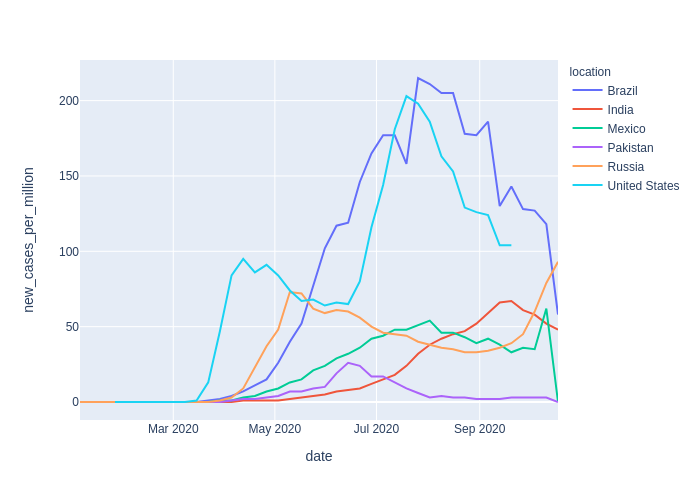

In [56]:
fig = px.line(other_country_weekly_mean_new, x="date", y="new_cases_per_million", color='location')
fig.write_image("../images/team_weeklyCases.png")
Image(filename="../images/team_weeklyCases.png")
#fig.show()

### By looking at the graph we can see the peek week  for United states is July 19

In [37]:
idx = other_country_weekly_mean_new.groupby(['location'])['new_cases_per_million'].transform(max) == other_country_weekly_mean_new['new_cases_per_million'] 
other_country_weekly_mean_new[idx] 

,date,location,new_cases_per_million,new_deaths_per_million
29,2020-07-26,Brazil,215.0,5.0
79,2020-09-20,India,67.0,1.0
124,2020-10-11,Mexico,62.0,5.0
149,2020-06-14,Pakistan,26.0,0.0
209,2020-10-18,Russia,93.0,1.0
25,2020-07-19,United States,203.0,2.0


## Weekly Death Trends

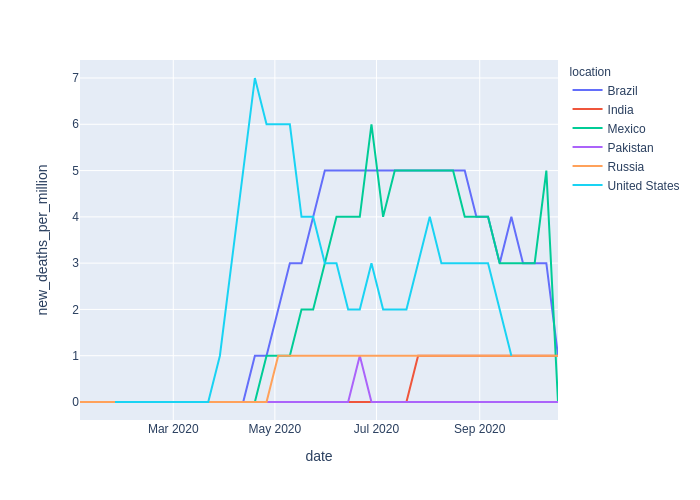

In [57]:
fig = px.line(other_country_weekly_mean_new, x="date", y="new_deaths_per_million", color='location')
fig.write_image("../images/team_weeklyDeaths.png")
Image(filename="../images/team_weeklyDeaths.png")
#fig.show()

### From the graph above we can get the peak week of the deaths in US and other countries

In [58]:
# peak week of the deaths in US and other countries is listed below
idx = other_country_weekly_mean_new.groupby(['location'])['new_deaths_per_million'].transform(max) == other_country_weekly_mean_new['new_deaths_per_million'] 
other_country_weekly_mean_new[idx] 

,date,location,new_cases_per_million,new_deaths_per_million
21,2020-05-31,Brazil,102.0,5.0
22,2020-06-07,Brazil,117.0,5.0
23,2020-06-14,Brazil,119.0,5.0
24,2020-06-21,Brazil,146.0,5.0
25,2020-06-28,Brazil,165.0,5.0
26,2020-07-05,Brazil,177.0,5.0
27,2020-07-12,Brazil,177.0,5.0
28,2020-07-19,Brazil,158.0,5.0
29,2020-07-26,Brazil,215.0,5.0
30,2020-08-02,Brazil,211.0,5.0
